In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [95]:
# the labels are:
# 1st degree AV block
# Right bundle branch block
# Left bundle branch block
# Sinus bradycardia
# Atrial fibrillation
# Sinus tachycardia
# Normal
x_label = ['1dAVb','RBBB','LBBB','SB','AF','ST', 'Normal']

In [96]:
output = np.load('test1.npy')

In [97]:
ground_truth = np.genfromtxt('gold_standard.csv', delimiter=',')
ground_truth = ground_truth[1:]

In [98]:
# add a column in the end of dataset that represents 'normal ecg'
# this column is binary, it will be 1 if all values in a result are below the threshold, and 0 otherwise
def add_normal_column(threshold, dataset):
    f = lambda x: 1 if x < threshold else 0
    above_thresh = np.vectorize(f) 
    
    new_col = np.amax(dataset, axis=1)
    new_col = np.expand_dims(above_thresh(new_col), axis=1)
    return np.append(dataset, new_col, axis=1)

In [99]:
# add normal column to output and ground truth
threshold = 0.1
output = add_normal_column(threshold, output)
ground_truth = add_normal_column(threshold, ground_truth)
print(output.shape)
print(ground_truth.shape)

(827, 7)
(827, 7)


In [100]:
# plot sample prediction
def plot_prediction(sample_num):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X = np.arange(7)
    y_prediction_values = output[sample_num]
    y_ground_truth = ground_truth[sample_num]

    ax.bar(X - 0.125, y_ground_truth, width=0.25)
    ax.bar(X + 0.125, y_prediction_values, width=0.25)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xticks(X)
    ax.set_xticklabels(x_label)
    ax.legend(['ground truth', 'prediction'])
    
    plt.title('DNN prediction vs. ground truth for test sample #' + str(sample_num))
    plt.xlabel('Abnormality')
    plt.ylabel('Percent confidence')
    plt.show()

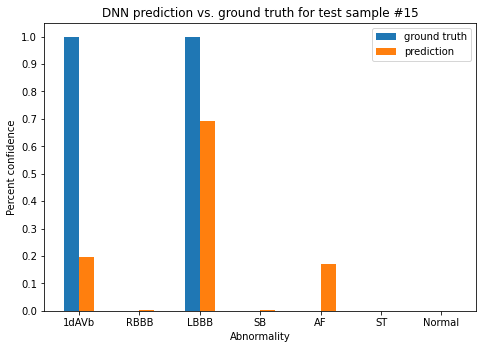

In [101]:
plot_prediction(15)

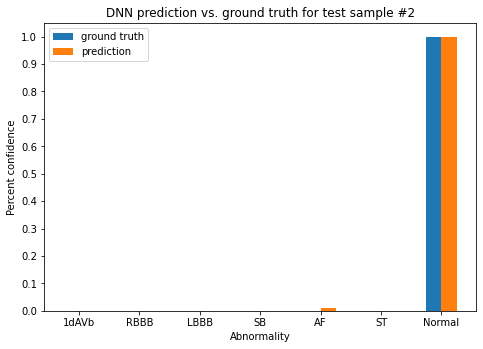

In [104]:
plot_prediction(2)